<a href="https://colab.research.google.com/github/Lenore8963/Decision-Tree-analyzing-Vancouver-real-estate-prices/blob/main/CS5330_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import files
from io import BytesIO
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

images = []
for fn in uploaded.keys():
  # Convert the uploaded file to an OpenCV image
  image_stream = BytesIO(uploaded[fn])
  image = Image.open(image_stream).convert('RGB')
  open_cv_image = np.array(image)
  # Convert RGB to BGR
  open_cv_image = open_cv_image[:, :, ::-1].copy()
  images.append(open_cv_image)


Saving Sky - City 1.jpg to Sky - City 1 (3).jpg
Saving Sky - City 2.jpg to Sky - City 2 (3).jpg
Saving Sky - City 3.png to Sky - City 3 (3).png
Saving Sky - City 4.jpg to Sky - City 4 (3).jpg
Saving Sky - City 5.jpg to Sky - City 5 (3).jpg
Saving Sky - City 6.jpg to Sky - City 6 (2).jpg
Saving Sky - City 7.jpeg to Sky - City 7 (1).jpeg
Saving Sky - City 8.PNG to Sky - City 8 (1).PNG
Saving Sky 11 - Sunrise.jpg to Sky 11 - Sunrise (2).jpg
Saving Sky 12 - Sunrise.jpg to Sky 12 - Sunrise (2).jpg
Saving Sky 20 - Sunset.jpg to Sky 20 - Sunset (2).jpg


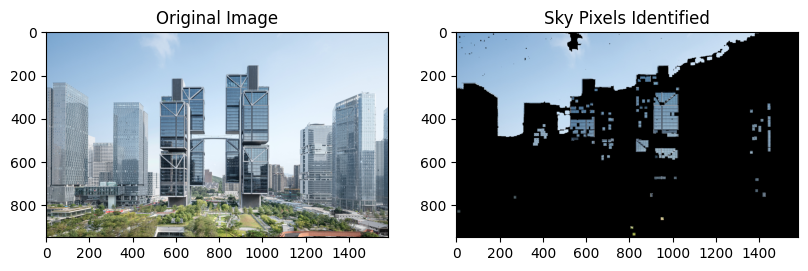

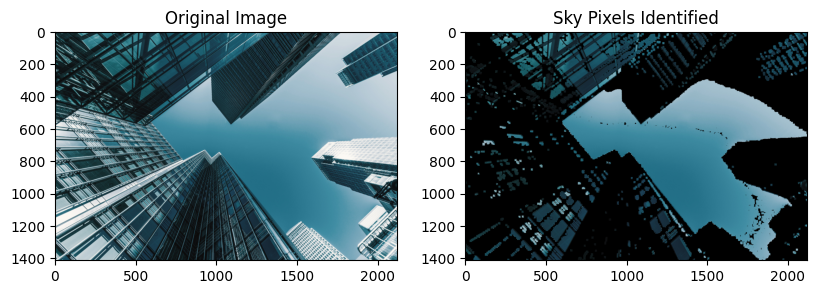

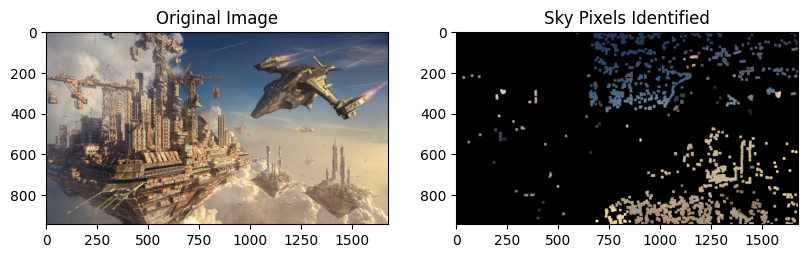

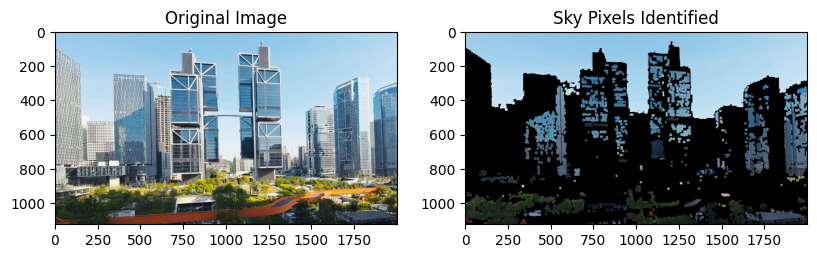

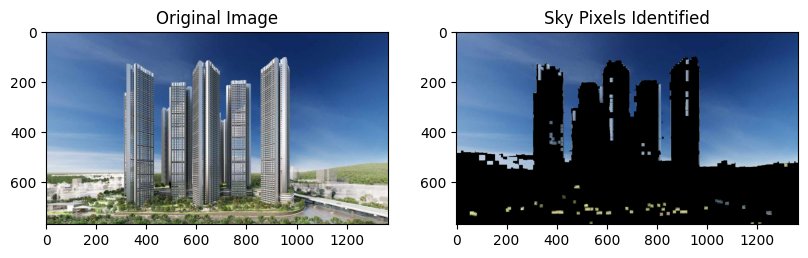

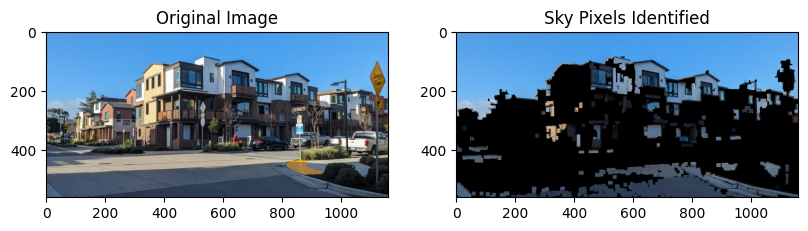

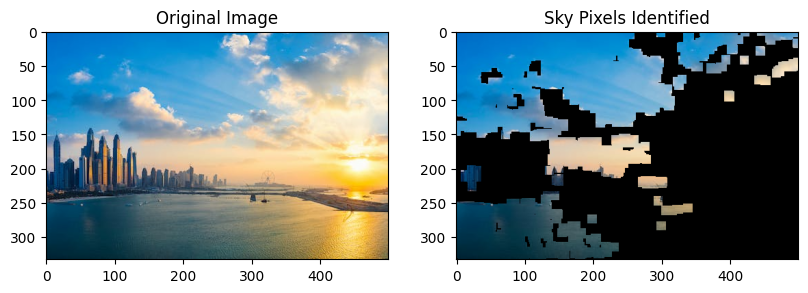

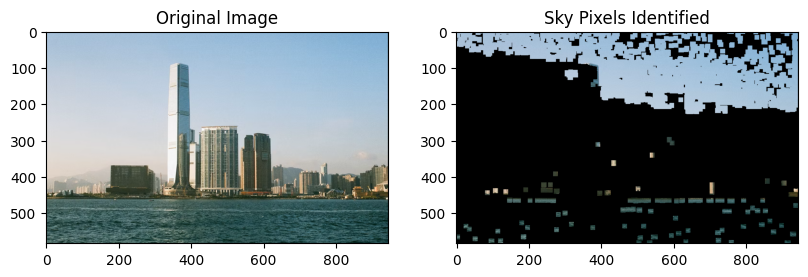

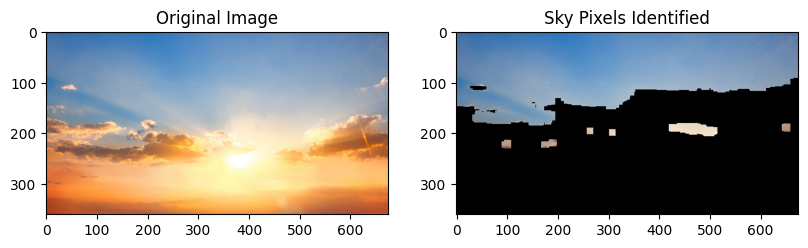

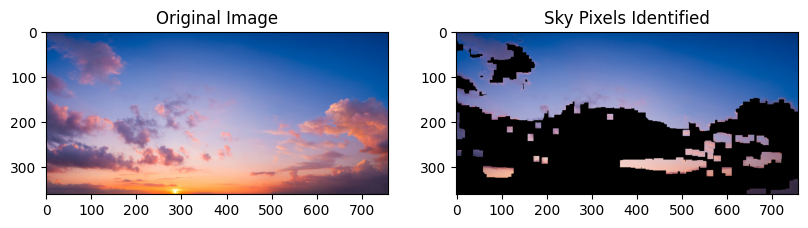

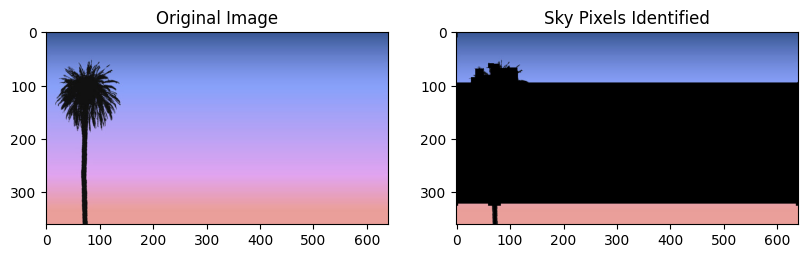

In [46]:
def process_image(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue, saturation, value = cv2.split(hsv_image)

    # Apply adaptive thresholding to the Value channel
    value_thresh = cv2.adaptiveThreshold(value, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Identify areas with low saturation (possible clouds)
    low_saturation_areas = cv2.inRange(saturation, 0, 40)  # Adjust the upper limit as needed

    def create_combined_color_mask(hsv_image, color_bounds):
        # Initialize an empty mask
        combined_color_mask = np.zeros(hsv_image.shape[:2], dtype="uint8")

        # Iterate through each color range
        for (lower_bound, upper_bound) in color_bounds:
            # Generate mask for current color range and combine it with the existing mask
            color_mask = cv2.inRange(hsv_image, np.array(lower_bound), np.array(upper_bound))
            combined_color_mask = cv2.bitwise_or(combined_color_mask, color_mask)

        return combined_color_mask

    # Define color ranges to filter out
    color_bounds = [
        ([20, 100, 100], [30, 255, 255]),  # Yellow
        ([35, 100, 100], [85, 255, 255]),  # Green
        ([10, 100, 20], [20, 255, 200]),   # Brown
        ([10, 100, 100], [20, 255, 255]),  # Orange
        ([0, 0, 50], [180, 50, 220]),      # Grey
        # ([125, 50, 50], [145, 255, 255]),  # Purple
        ([0, 100, 100], [10, 255, 255]),   # Red1
        ([125, 70, 70], [180, 255, 255]) # Red2
    ]

    # Create the combined color mask
    color_mask = create_combined_color_mask(hsv_image, color_bounds)


    # Filter out these colors from the sky mask
    sky_mask = cv2.bitwise_and(value_thresh, value_thresh, mask=cv2.bitwise_not(color_mask))

    # Combine the low saturation mask with the sky mask
    combined_mask = cv2.bitwise_and(sky_mask, sky_mask, mask=cv2.bitwise_not(low_saturation_areas))

    # Remove very bright areas (like the sun)
    bright_thresh = 245  # Adjust as needed
    very_bright_areas = cv2.inRange(value, bright_thresh, 255)
    combined_mask = cv2.bitwise_and(combined_mask, combined_mask, mask=cv2.bitwise_not(very_bright_areas))

    # Apply morphological operations
    kernel = np.ones((5,5), np.uint8)
    combined_mask = cv2.erode(combined_mask, kernel, iterations=1)
    combined_mask = cv2.dilate(combined_mask, kernel, iterations=3)

    # Apply edge detection on the combined mask
    edges = cv2.Canny(combined_mask, 100, 200)

    # Combine the mask with the original image
    result = cv2.bitwise_and(image, image, mask=combined_mask)

    return result, edges

# Process each image
processed_images_and_edges = [process_image(img) for img in images]

# Display results along with edges
for original, (processed, edges) in zip(images, processed_images_and_edges):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title('Sky Pixels Identified')

    plt.show()


In [15]:
!pip install gradio==3.43.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579 sha256=6c52e11c863a9c9e4a9f06f10fa5a05a2bd426a3c38797e5179a950928361588


In [24]:
import gradio as gr

def gradio_process_image(image):
    # Convert the image from RGB (used by Gradio) to BGR (used by OpenCV)
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Process the image using our function
    processed_image, _dh = process_image(image_bgr)

    # Convert the processed image back to RGB for display in Gradio
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

    return processed_image_rgb

# Create the Gradio interface
iface = gr.Interface(
    fn = gradio_process_image,
    inputs = gr.inputs.Image(type="numpy", label="Upload an Image"),
    outputs = gr.outputs.Image(type="numpy", label="Sky Identified"),
    title="Sky Pixel Identification",
    description="Upload an image to identify sky pixels."
)

# Launch the app
iface.launch()


<ipython-input-24-dc179792ba2a>:18: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Image(type="numpy", label="Upload an Image"),
<ipython-input-24-dc179792ba2a>:18: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Image(type="numpy", label="Upload an Image"),
<ipython-input-24-dc179792ba2a>:19: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Image(type="numpy", label="Sky Identified"),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>